In [1]:

import pandas as pd
import pickle
import sqlite3
import os
import numpy as np
import sys
import gensim
import matplotlib.pyplot as plt 
from textwrap import wrap
import xarray as xr

# sys.path.append(r'C:\Users\aspit\Git\MHDLab-Projects\Energy Storage\nlp_utils')

from nlp_utils import gensim_utils, sklearn_utils


from gensim.models import LdaModel
lda_model_loaded = LdaModel.load(r'C:\Users\aspit\Git\NLP\SciLitNLP\modeling\lda\models\ldamod_cit_tree.lda')

from nlp_utils import gensim_utils, sklearn_utils, fileio

db_folder = r'E:\\'
con = sqlite3.connect(os.path.join(db_folder, 'soc.db'))
cursor = con.cursor()
df = fileio.load_df_semantic(con, lda_model_loaded.idx)
df = df.rename({'year': 'Year', 's2Url': 'display_url'}, axis=1)
df['inCitations'] = df['inCitations'].apply(",".join)

In [2]:

df_topickeywords, doc_topic_probs = gensim_utils.gensim_topic_info(lda_model_loaded, lda_model_loaded.data_words, lda_model_loaded.id2word)


In [3]:

df_doc_topic_probs = pd.DataFrame(doc_topic_probs, columns=df_topickeywords.index, )
df_doc_topic_probs.index = df.index
df_doc_topic_probs


topic,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,...,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30
id,,,,,,,,,,,,,,,,,,,,,
2b5d5551378c8f81be4138eee40a78b05f4fc90c,0.000439,0.000439,0.000439,0.000439,0.000439,0.461588,0.184172,0.000439,0.061372,0.000439,...,0.000439,0.000439,0.000439,0.000439,0.000439,0.000439,0.000439,0.029053,0.000439,0.000439
c34d34c8da1639d39fda11186dc311df51da2885,0.000903,0.851745,0.000903,0.000903,0.000903,0.000903,0.000903,0.000903,0.000903,0.000903,...,0.000903,0.000903,0.000903,0.000903,0.000903,0.000903,0.000903,0.000903,0.000903,0.068456
86522f9271d84027cdde52fd84d904e55f08703f,0.000596,0.000596,0.000596,0.000596,0.000596,0.000596,0.000596,0.000596,0.026053,0.337574,...,0.206332,0.000596,0.000596,0.000596,0.000596,0.000596,0.000596,0.000596,0.000596,0.082624
0a218bcf54a81a06e9b136b868b752e926bff104,0.000356,0.282401,0.000356,0.000356,0.000356,0.000356,0.000356,0.000356,0.000356,0.000356,...,0.452102,0.000356,0.000356,0.000356,0.024329,0.000356,0.093174,0.000356,0.000356,0.000356
e681fd90193ae81dc9c742088181e599b59b3115,0.000538,0.000538,0.138656,0.202030,0.065509,0.000538,0.072102,0.061289,0.000538,0.000538,...,0.000538,0.000538,0.032824,0.000538,0.000538,0.000538,0.018600,0.000538,0.000538,0.044124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ba14aa96ac50c9bb61de13dc7c48b19aae8a9007,0.018876,0.000539,0.000539,0.000539,0.000539,0.475782,0.137554,0.000539,0.019506,0.000539,...,0.000539,0.000539,0.000539,0.112568,0.016895,0.000539,0.030848,0.000539,0.000539,0.000539
9d8e26f1d01ef36b9a119d6a6460b6009d129223,0.000375,0.000375,0.000375,0.000375,0.000375,0.926666,0.000375,0.000375,0.000375,0.000375,...,0.000375,0.000375,0.000375,0.015032,0.025625,0.000375,0.000375,0.000375,0.000375,0.000375
2b3e7caba4e107860de172d9a3e3abfad203338d,0.000384,0.014040,0.000384,0.000384,0.000384,0.000384,0.113823,0.170834,0.000384,0.000384,...,0.000384,0.000384,0.000384,0.027268,0.000384,0.114706,0.000384,0.000384,0.000384,0.000384


In [4]:
n_topics = doc_topic_probs.shape[1]


<AxesSubplot:>

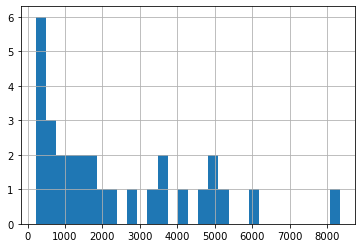

In [5]:
df_doc_topic_probs.sum().hist(bins = n_topics)

<AxesSubplot:xlabel='topic'>

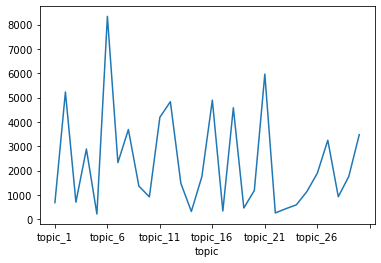

In [6]:
df_doc_topic_probs.sum().plot()

In [7]:
years = list(set(df['Year'].dropna()))



In [8]:


df_topicsyear = pd.DataFrame(index=years, columns=df_topickeywords.index, dtype=float)
df_topicsyear.index.name = 'year'
# df_topicsyear = df_topicsyear.replace(np.nan, 0.0)


for year in years: 
    ids = df[df['Year'] == year].index
    topics_year = df_doc_topic_probs.loc[ids].sum()

    topics_year = topics_year/topics_year.sum()

    df_topicsyear.loc[year] = topics_year



In [9]:

#normailze each topic by it's relative weight (cancels year normalization, but allows for better comparison of slopes)
#TODO: just normalize slope by sum after fitting? 
for topic_id in df_topicsyear:
    df_topicsyear[topic_id] = df_topicsyear[topic_id]/sum(df_topicsyear[topic_id])

In [10]:
from nlp_utils.plot import top_slopes_plot

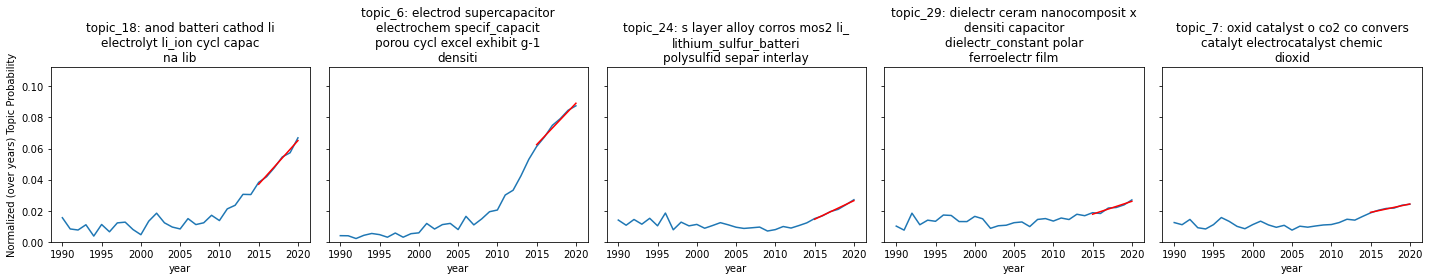

In [11]:
topic_strs = df_topickeywords.apply(" ".join, axis=1)


# top_slopes = s_slopes.sort_values(ascending=False)[0:5]
year_range_fit = slice(2015,2020)
year_range_plot = slice(1990,2020)

fig = top_slopes_plot(df_topicsyear.loc[year_range_plot], topic_strs, year_range_fit)


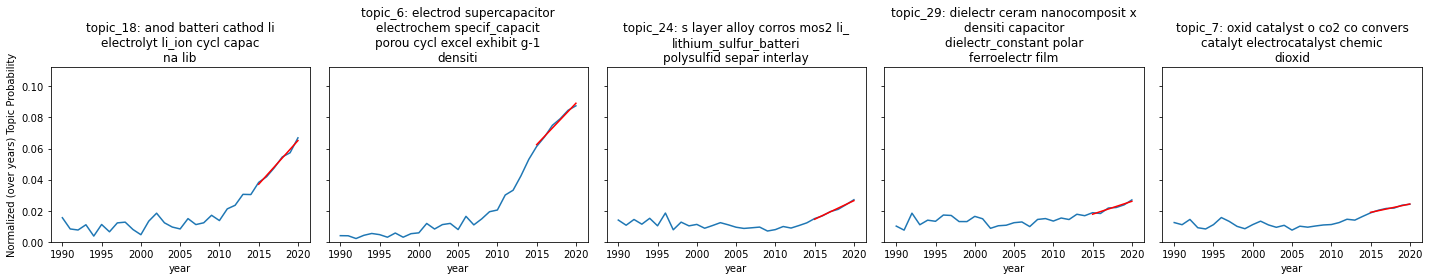

In [12]:
fig

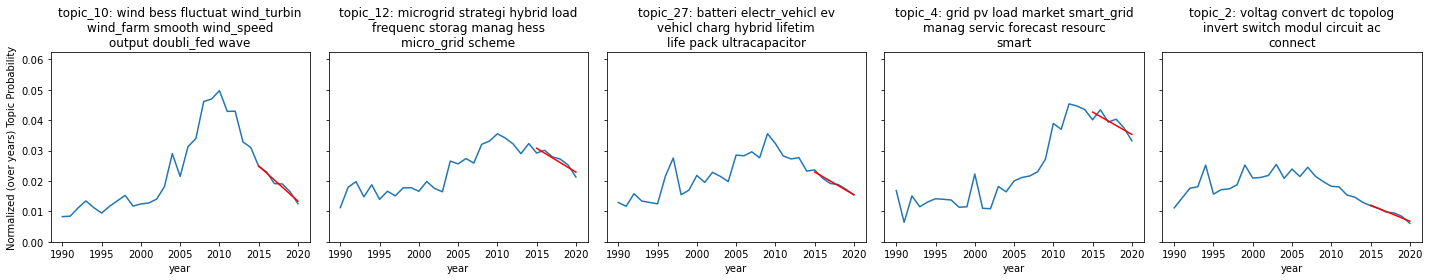

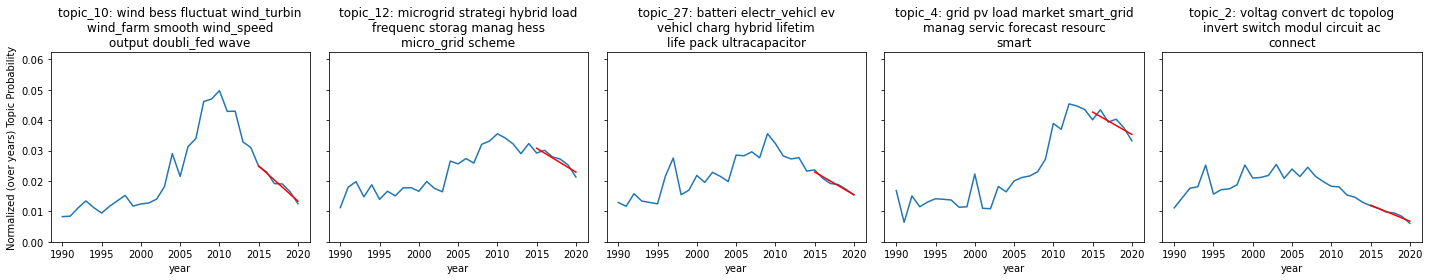

In [13]:
top_slopes_plot(df_topicsyear.loc[year_range_plot], topic_strs, year_range_fit, ascending=True)



In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70224 entries, 2b5d5551378c8f81be4138eee40a78b05f4fc90c to cef763971f8ae220d6d2c106b2cc2a3c134317eb
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          70224 non-null  object
 1   paperAbstract  70224 non-null  object
 2   inCitations    70224 non-null  object
 3   outCitations   70224 non-null  object
 4   Year           70224 non-null  int32 
 5   display_url    70224 non-null  object
 6   doi            70224 non-null  object
 7   fieldsOfStudy  70224 non-null  object
 8   magId          70224 non-null  object
 9   years_ago      70224 non-null  int32 
dtypes: int32(2), object(8)
memory usage: 7.4+ MB


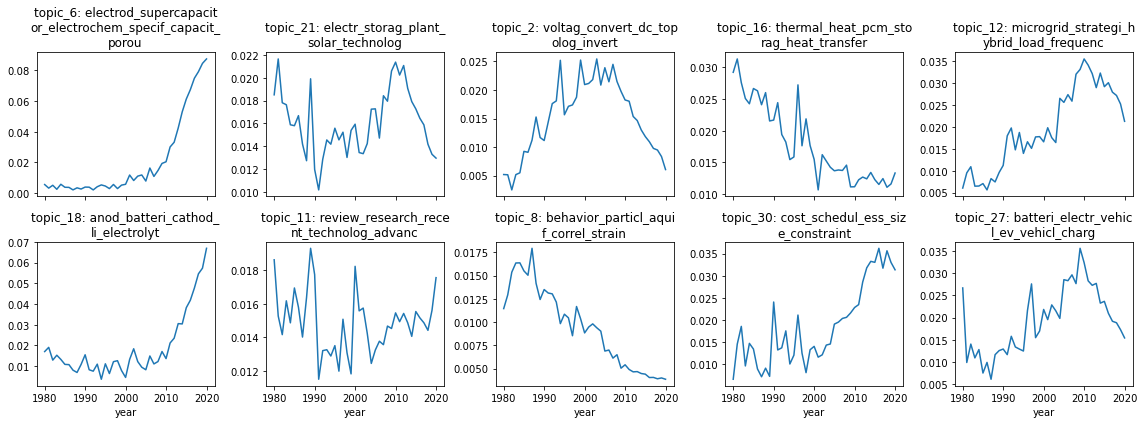

In [15]:

#Method from other script showing the top topics my average probability over years

sorted_topics = df_doc_topic_probs.sum().sort_values(ascending=False)

keywords = df_topickeywords[df_topickeywords.columns[0:5]].apply("_".join, axis=1)
sorted_keywords = keywords.loc[sorted_topics.index]

da = xr.Dataset.from_dataframe(df_topicsyear).to_array('topic')
da = da.sel(year=slice(1980,2020))
da = da.sel(topic = sorted_topics[0:10].index.values)

g = da.plot(col='topic', col_wrap=5, sharey=False)

for i, ax in enumerate(g.axes.flatten()):
    topic = sorted_keywords.index[i]
    s = sorted_keywords[topic]
    s = str(topic) + ": " + s
    s = "\n".join(wrap(s, 30))
    ax.set_title(s)

plt.gcf().tight_layout()

